# import lib

In [67]:
%run -i common_utils.ipynb

In [51]:
import ast
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/maipham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Read data

In [11]:
df = pd.read_csv('conversation_after_data.csv')
df

turn_id  turn_timeout turn_error  \
0     f3bad83c-fc02-4dbf-9259-7c968a34b524         False        NaN   
1     59c0cdb3-6374-4160-8458-5b8f3f04f14e         False        NaN   
2     e1d9df56-ca79-4910-a9d8-764de23de21f         False        NaN   
3     29eae7f0-ff25-47d6-97f4-a3d3906177e7         False        NaN   
4     53ceb643-7fa9-44c5-859f-0951afb56f02         False        NaN   
...                                    ...           ...        ...   
3754  ee070a13-183f-4f09-ab7b-e1b97d781e81         False        NaN   
3755  9085c495-551a-4700-91d5-c879e9898c9c         False        NaN   
3756  c9b3eaef-0d33-41a7-8aaf-719bf56b3f81         False        NaN   
3757  ed920cdd-3d30-4115-b7ea-5848f857db56         False        NaN   
3758  385a963c-39de-48d4-ab3b-66edce2b5724         False        NaN   

                                            user_prompt  \
0             what do you think about hanson's robotics   
1     sure but will the robots have personalities of...   
2                                              i'm what   
3                      i need help with my mental house   
4                  have you ever started it boarding it   
...                                                 ...   
3754               yes i have a working for three years   
3755  alexa give me some ideas about the kind of bus...   
3756                                                 no   
3757                       alexa please play some music   
3758                                         let's chat   

                                    candidate_responses  \
0     {"TOPIC_SELECTION_RESPONDER":"We can talk abou...   
1     {"EMPATHY_NRG":"I see. I think it would be rea...   
2     {"EMPATHY_NRG":"Ok. Do you like going to conce...   
3     {"EMPATHY_NRG":"I&apos;m sorry to hear that. C...   
4     {"EMPATHY_NRG":"That is a good point. Do you w...   
...                                                 ...   
3754  {"SENSITIVE_RESPONDER":"I don't feel comfortab...   
3755  {"SENSITIVE_RESPONDER":"I don't feel comfortab...   
3756  {"EMPATHY_NRG":"i've been reading about the di...   
3757  {"EMPATHY_NRG":"I don't know. I'm not a very g...   
3758  {"EMPATHY_NRG":"I'm not sure about that.","ATM...   

                                           bot_response  \
0     We can talk about books, movies, music, and mo...   
1     It's also helpful to keep in mind some strateg...   
2                                    i am ten years old   
3     It sounds like incorporating daily exercises l...   
4     Graphic novels are long-form fictional works o...   
...                                                 ...   
3754  I don't feel comfortable talking about that. L...   
3755  I don't feel comfortable talking about that. L...   
3756              What is your favorite woman magazine?   
3757  Because they are offensive and can hurt people...   
3758  While the time may be 9pm, it's important to p...   

                                  search_bot_api_output follow_up_flow  \
0     I think that's amazing! how did you come up wi...            NaN   
1     It's hard to say. it depends on how you define...           True   
2     i'm sorry, i didn't know that. i'll try to rem...           True   
3     Oh, i see. well, i guess i can see how that wo...           True   
4     It's good that you are both taking steps to im...           True   
...                                                 ...            ...   
3754                             It's pretty hot today.            NaN   
3755  I think it's amazing. it's a way to connect wi...            NaN   
3756                                                NaN           True   
3757  i think that jackson was a genius in the music...           True   
3758  So, what do you think of the Alexa Prize socia...           True   

                                        conversation_id  \
0     d4c355da98ce66b013724122d71e5a68e00cb756f2e52e...   
1     d4c355da98ce66b013724122d71e5a68e00cb756f2

# basic 

## count number of word

In [12]:
def num_of_words(df, col):
    df[col + '_wc'] = df[col].apply(lambda x : len(str(x).split(" ")))
    return df

In [13]:
df = num_of_words(df, 'user_prompt')

In [21]:
df['ranker_input_dialog_context']

0                                                      []
1       [{"text":"what do you think about hanson's rob...
2       [{"text":"let's chat","response":"Hi, this is ...
3       [{"text":"let's chat","response":"Hi, this is ...
4       [{"text":"let's chat","response":"Hi, this is ...
                              ...                        
3754    [{"text":"you","response":"I&apos;m Alexa. Wha...
3755    [{"text":"let's chat","response":"Hi, this is ...
3756    [{"text":"i need you to talk","response":"Hi, ...
3757    [{"text":"let's talk","response":"Hi, this is ...
3758    [{"text":"i want to have conversation with you...
Name: ranker_input_dialog_context, Length: 3759, dtype: object

In [32]:
df['dialog_contexts'] = df[~df['ranker_input_dialog_context'].isnull()]['ranker_input_dialog_context'].apply(lambda x: [s for c in ast.literal_eval(x) for s in c.values()])

In [33]:
df['dialog_context_turn_count'] = df[~df['dialog_contexts'].isnull()]['dialog_contexts'].apply(lambda x: len(x))

In [34]:
df['dialog_context_wc'] = df[~df['dialog_contexts'].isnull()]['dialog_contexts'].apply(lambda x: len(" ".join(x).split(" ")))

In [41]:
stop = stopwords.words('english')

In [48]:
df['stopwords'] = df[~df['dialog_contexts'].isnull()]['dialog_contexts'].apply(lambda x: len([y for y in " ".join(x).split() if y in stop]))

In [54]:
df['sentiment_user_prompt'] = df['user_prompt'].apply(lambda x: TextBlob(str(x)).sentiment[0])

In [75]:
df['sentiment_dialog_contexts'] = df[~df['dialog_contexts'].isnull()]['dialog_contexts'].apply(lambda x: TextBlob(" ".join([y for y in " ".join(x).split() if y not in stop])).sentiment[0])

In [69]:
df['rating'] = round(df['rating'])

In [85]:
df[~df.apply(lambda x: str(x['candidate_responses_search_bot_responder']) in str(x['search_bot_api_output'])  or str(x['search_bot_api_output']) in str(x['candidate_responses_search_bot_responder']), axis=1)]

turn_id  turn_timeout turn_error  \
6     3f48ba14-a78a-466a-b1b0-008f5d9550c4         False        NaN   
13    958b9475-883e-4cc6-83f7-ffda88509f7f         False        NaN   
15    39f062a4-ef1b-4a10-8c4f-6c26a6201b27         False        NaN   
17    53a95fc6-04e4-4173-bcb3-1a025c32cd1d         False        NaN   
19    fde3f753-4a79-453e-b39e-85f683093da8         False        NaN   
...                                    ...           ...        ...   
3746  2de657ea-37f1-4568-9512-d302571cc259         False        NaN   
3752  d0188170-9162-43ca-a17c-724cacbe708a         False        NaN   
3754  ee070a13-183f-4f09-ab7b-e1b97d781e81         False        NaN   
3756  c9b3eaef-0d33-41a7-8aaf-719bf56b3f81         False        NaN   
3757  ed920cdd-3d30-4115-b7ea-5848f857db56         False        NaN   

                               user_prompt  \
6                order santa it's going on   
13                                      no   
15                                      no   
17                                    yeah   
19                               echo stop   
...                                    ...   
3746                 i don't know that one   
3752               i really don't have one   
3754  yes i have a working for three years   
3756                                    no   
3757          alexa please play some music   

                                    candidate_responses  \
6     {"EMPATHY_NRG":"i could help if i could help. ...   
13    {"EMPATHY_NRG":"I don't feel comfortable talki...   
15    {"EMPATHY_NRG":"Thanks. Anything else you&apos...   
17    {"EMPATHY_NRG":"I see. Thanks for sharing that...   
19    {"ATM5B":"Yes I do.","EMPATHY_NRG":"Yes, I'm a...   
...                                                 ...   
3746  {"EMPATHY_NRG":"Ok. Do you like terrestrial?",...   
3752  {"TOPIC_SELECTION_RESPONDER":"We can talk abou...   
3754  {"SENSITIVE_RESPONDER":"I don't feel comfortab...   
3756  {"EMPATHY_NRG":"i've been reading about the di...   
3757  {"EMPATHY_NRG":"I don't know. I'm not a very g...   

                                           bot_response  \
6     &quot;Staying to a sleep schedule is important...   
13    The first way is to be physically active. this...   
15    Wow four? I've no use for apps like Alexa, right?   
17    The good news is that Fitbit offers a three-mo...   
19    No, i am not a christian. i think that there i...   
...                                                 ...   
3746  Bird eggs, especially those from chickens, duc...   
3752  We can talk about books, movies, music, and mo...   
3754  I don't feel comfortable talking about that. L...   
3756              What is your favorite woman magazine?   
3757  Because they are offensive and can hurt people...   

                                  search_bot_api_output follow_up_flow  \
6     You're right, it is going on. i'm glad you ask...           True   
13    You should check out the game "princess quest"...           True   
15                Well, I think you're really talented!           True   
17    I'm glad you like her music. it's great to be ...           True   
19                                                  NaN           True   
...                                                 ...            ...   
3746  i think it is possible that technology could h...           True   
3752              Well, what kind of music do you like?            NaN   
3754                             It's pretty hot today.            NaN   
3756                                                NaN           True   
3757  i think that jackson was a genius in the music...           True   

                                        conversation_id  \
6     e9afabe5a6a68921bbcd949bfa63bcb7a54d2bfc79e705...   
13    e9afabe5a6a68921bbcd949bfa63bcb7a54d2bfc79e705...   
15    e9afabe5a6a68921bbcd949bfa63bcb7a54d2bfc79e705...   
17    e9afabe5a6a68921bbcd949bfa63bcb7a54d2bfc79e705...   
19    bba993a0f3dc806c4307d

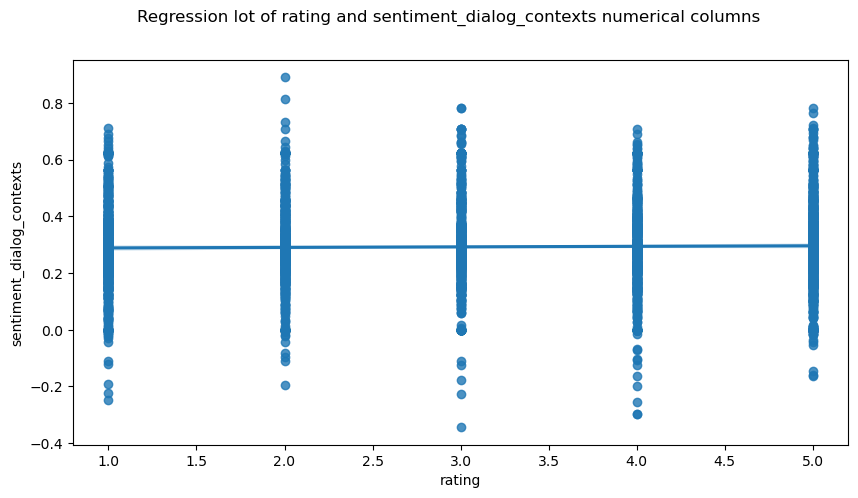

In [77]:
eda_2d_scatter_plots(df, 'rating', 'sentiment_dialog_contexts')

In [71]:
df['subjectivity_dialog_contexts'] = df[~df['dialog_contexts'].isnull()]['dialog_contexts'].apply(lambda x: TextBlob(" ".join(x)).sentiment[1])

In [86]:
df.columns

Index(['turn_id', 'turn_timeout', 'turn_error', 'user_prompt',
       'candidate_responses', 'bot_response', 'search_bot_api_output',
       'follow_up_flow', 'conversation_id', 'start_timestamp', 'end_timestamp',
       'dialog_act_intent_dialogactintent', 'dialog_act_intent_topic',
       'ranker_input_dialog_context', 'ranker_input_responses',
       'candidate_responses_empathy_nrg',
       'candidate_responses_search_bot_responder', 'chatgpt_response',
       'conversation_id.1', 'approximate_start_time', 'rating',
       'conversationdurationinseconds', 'feedback', 'exception_caused_by',
       'user_prompt_wc', 'dialog_context_turn_count', 'dialog_context_wc',
       'dialog_contexts', 'stopwords', 'sentiment_user_prompt',
       'sentiment_dialog_contexts', 'subjectivity_dialog_contexts'],
      dtype='object')

In [90]:
numerical_columns = ['user_prompt_wc', 'dialog_context_turn_count', 'dialog_context_wc',
         'stopwords', 'sentiment_user_prompt',
       'sentiment_dialog_contexts', 'subjectivity_dialog_contexts']


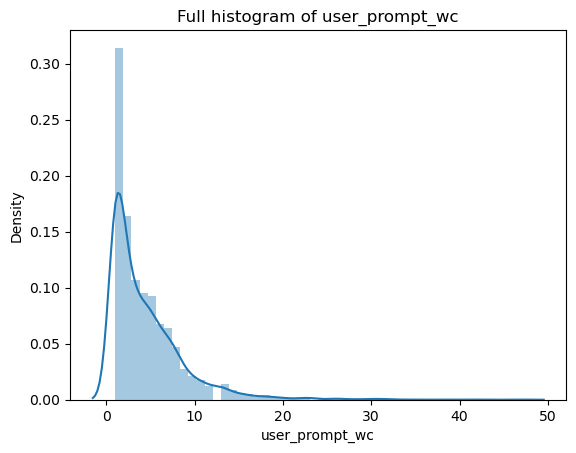
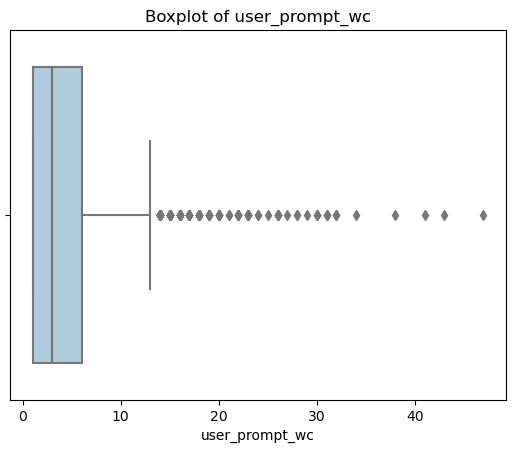
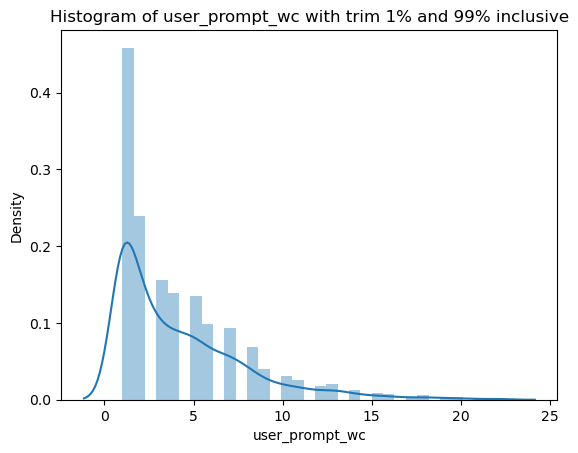


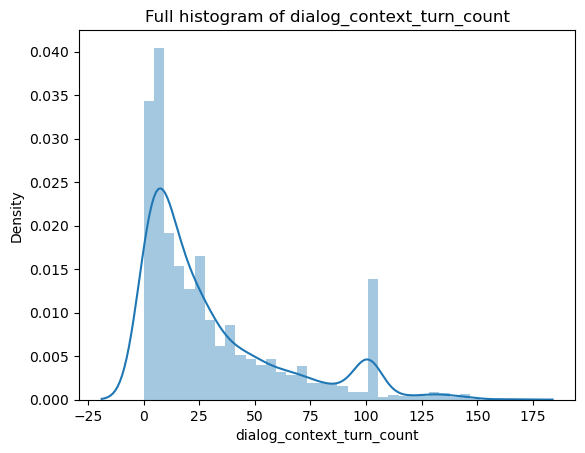
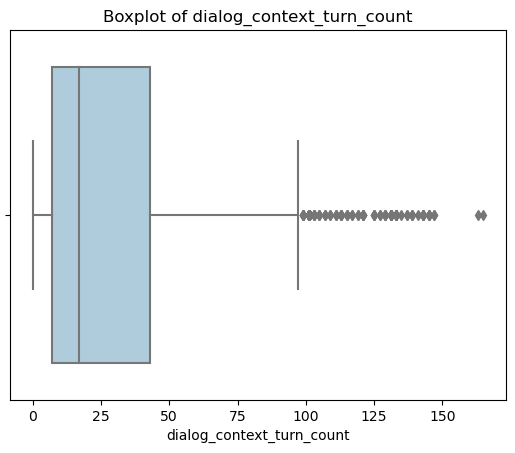
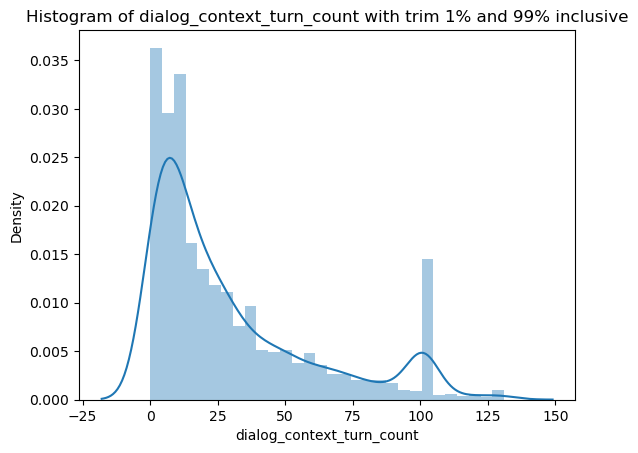


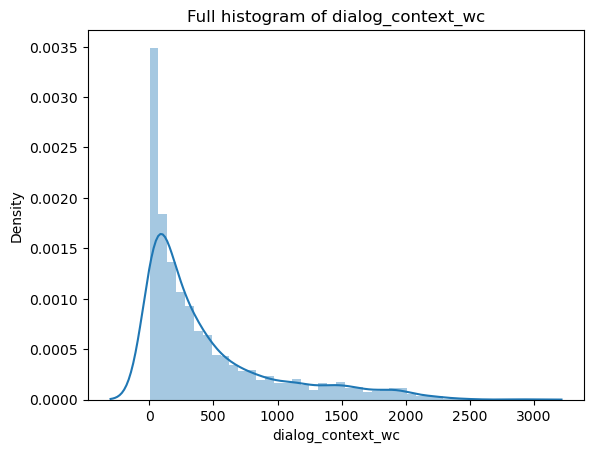
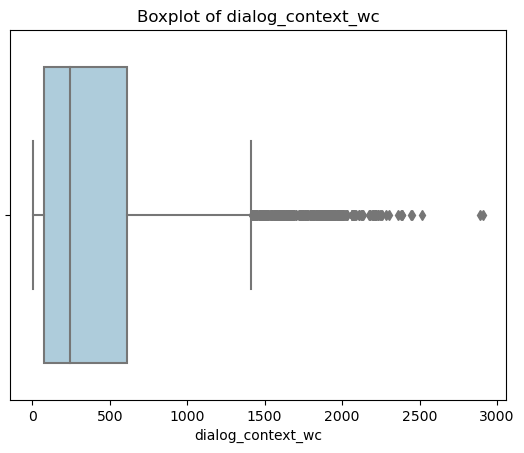
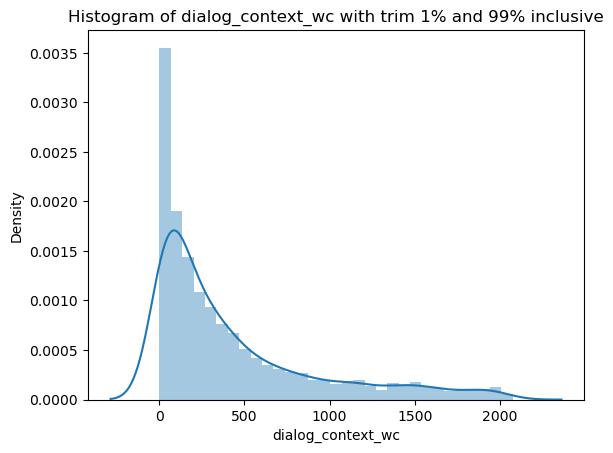


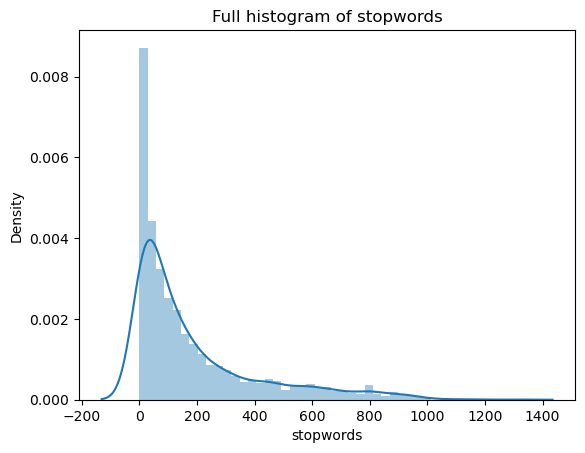
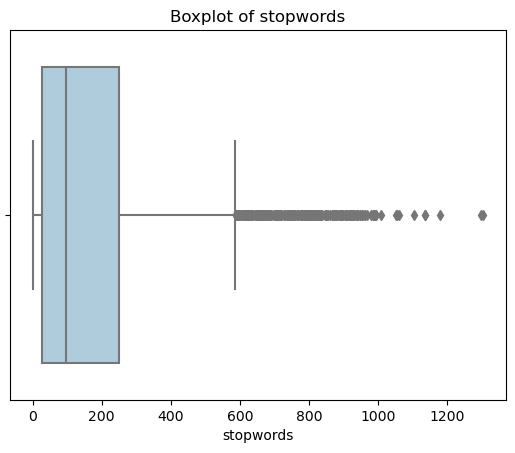
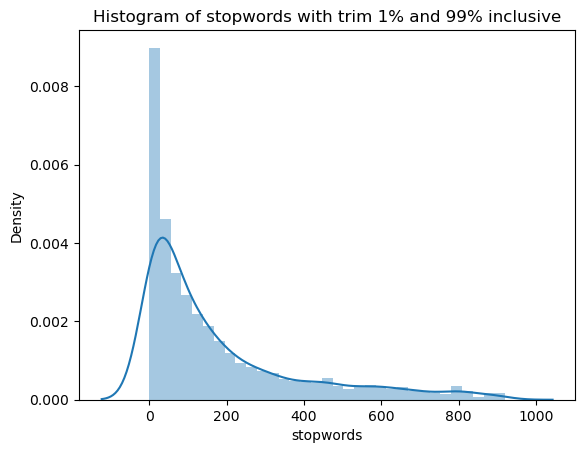


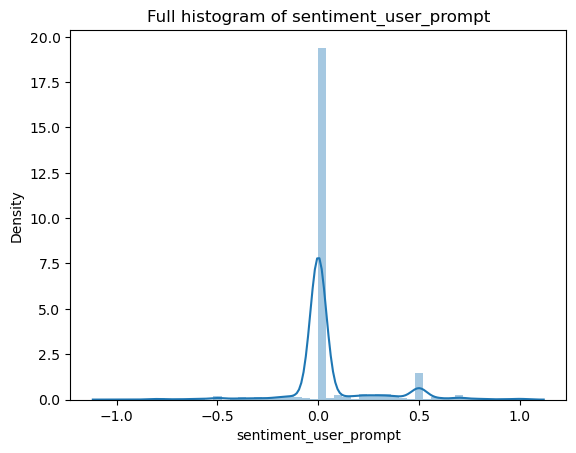
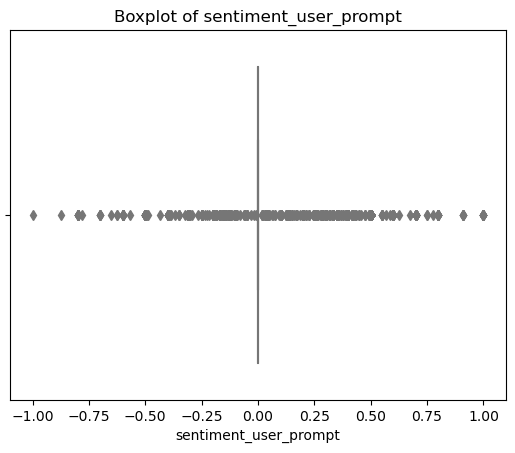
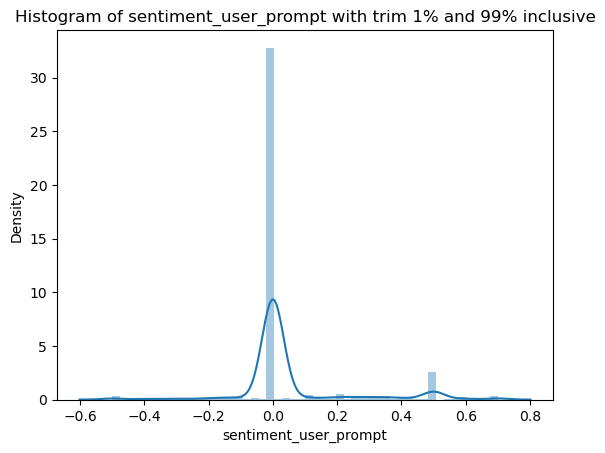


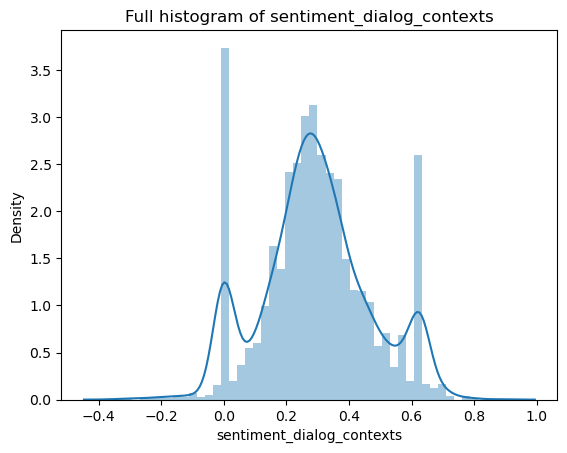
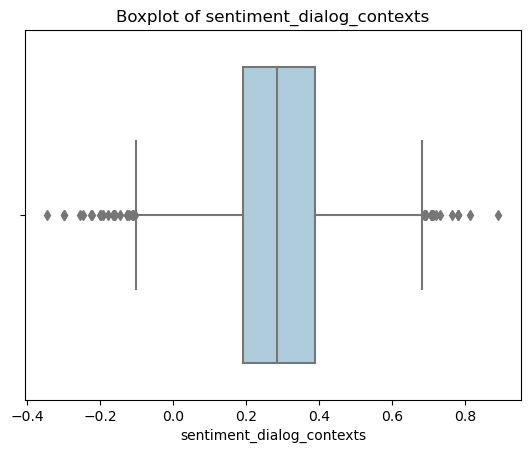
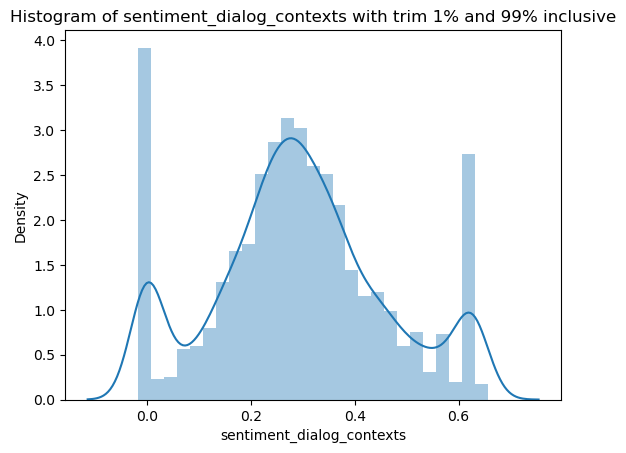


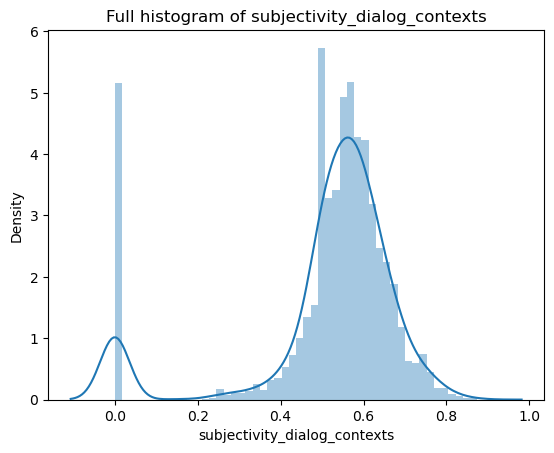
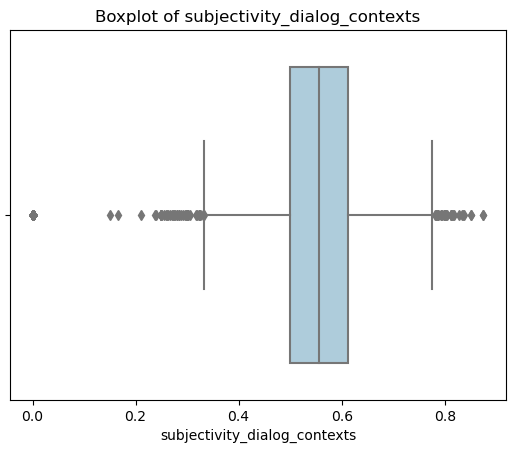
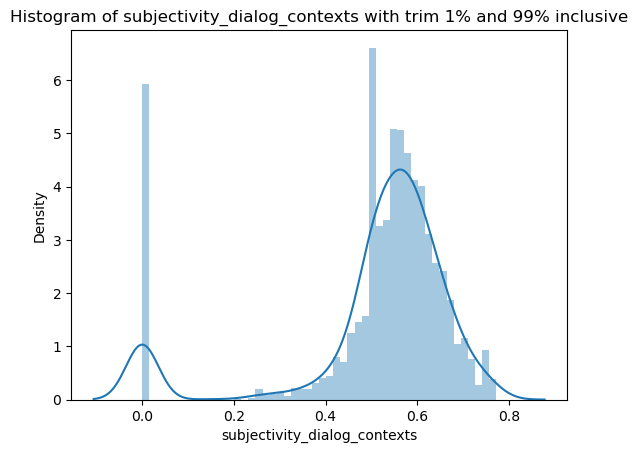

In [91]:
for col in numerical_columns:
    eda_1d_numerical_column(df, col)

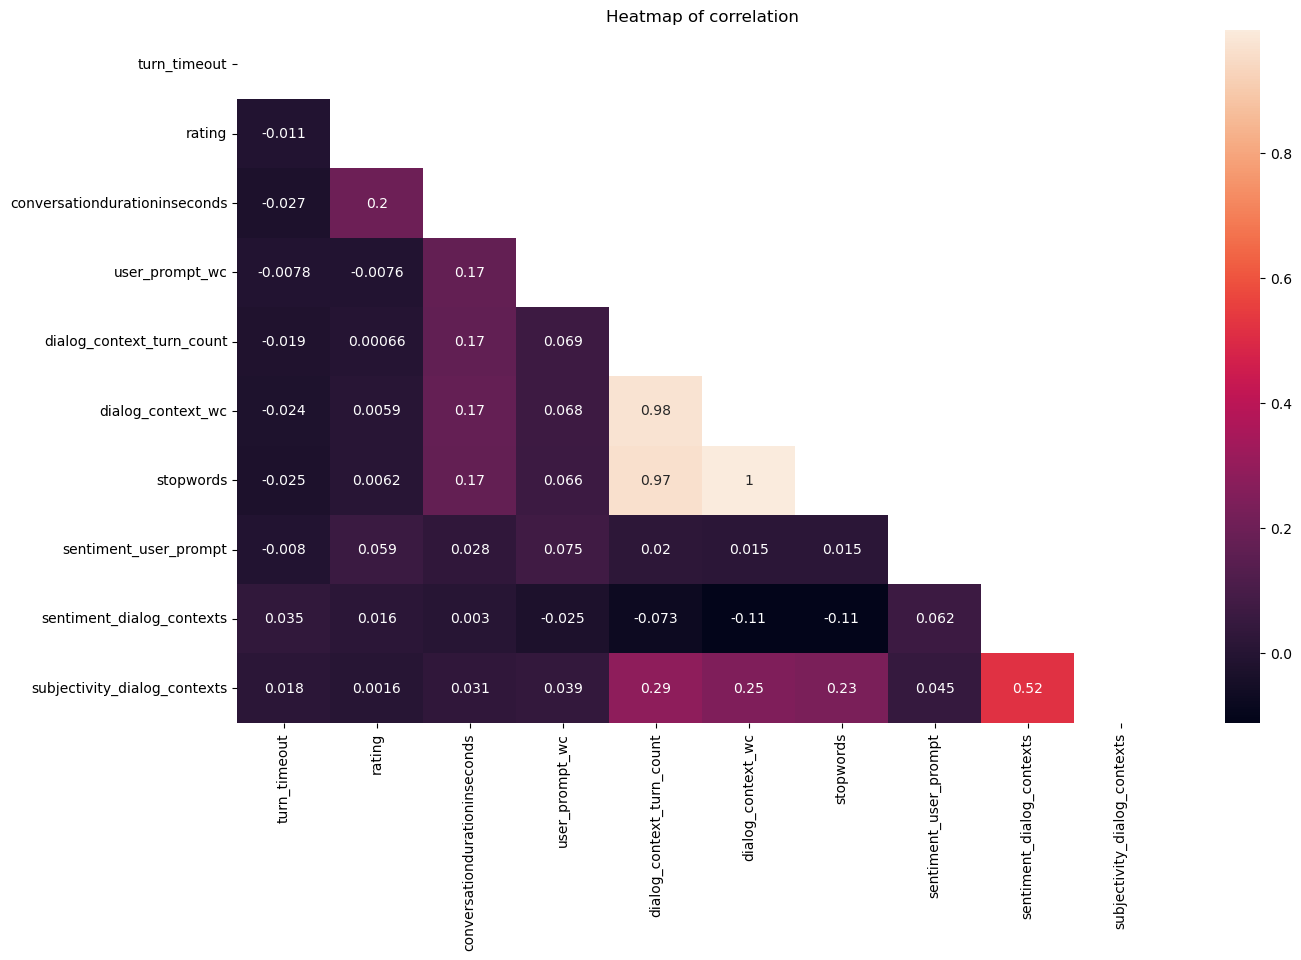

In [76]:
heatmap_corr(df)